In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

# define the parameters that will be used in the data file
delX = 1/12
delY = 1/16
xgOrigin = 67.6028
ygOrigin = 8.6198
n_rows = 200
n_cols = 108

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

In [2]:
# Define the parameters 
delX = 1/12  # Longitude spacing
delY = 1/16  # Latitude spacing
xgOrigin = 64.4671  # New starting longitude (expanded further west)
ygOrigin = 8.2159  # Starting latitude remains the same

# Define the new boundaries
longitude_max = 77.8186  # Eastern boundary remains the same
latitude_max = 24.0527  # Expanded further north

# Calculate the number of columns and rows for the expanded area
n_cols = int((longitude_max - xgOrigin) / delX)
n_rows = int((latitude_max - ygOrigin) / delY)

# Generate the expanded grid
xc = np.arange(xgOrigin + delX / 2, xgOrigin + n_cols * delX + delX / 2, delX)
yc = np.arange(ygOrigin + delY / 2, ygOrigin + n_rows * delY + delY / 2, delY)
XC, YC = np.meshgrid(xc, yc)



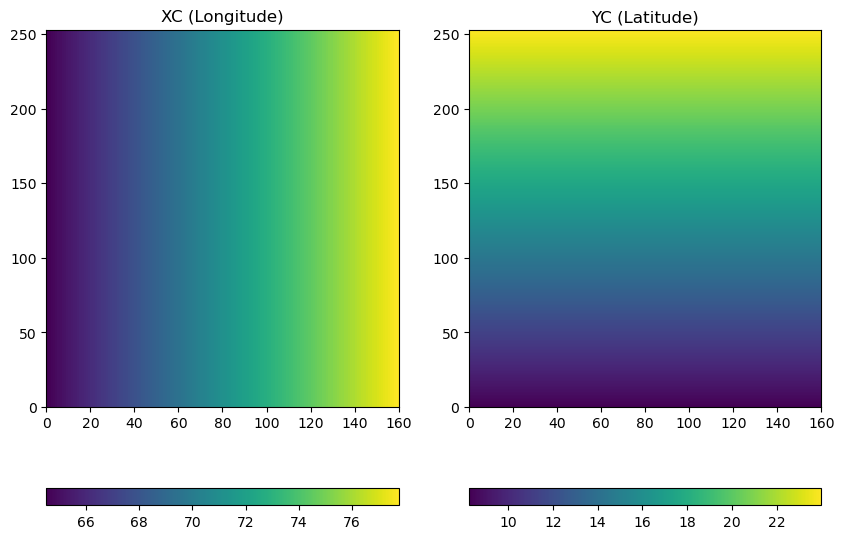

In [3]:

# make a plot of XC and YC
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
C = plt.pcolormesh(XC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')

plt.show()

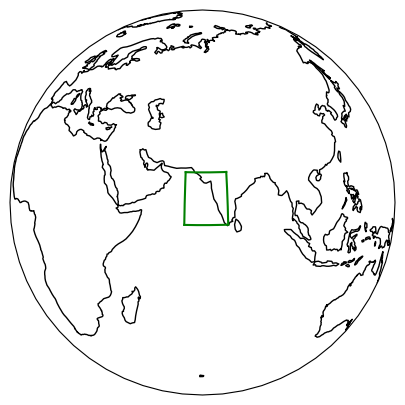

In [4]:
plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.Orthographic(70, 15))
ax.plot(XC[:,0], YC[:,0], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.show()

In [5]:
def great_circle_distance(lon_ref, lat_ref, Lon, Lat):
    earth_radius = 6371000
    lon_ref_radians = np.radians(lon_ref)
    lat_ref_radians = np.radians(lat_ref)
    lons_radians = np.radians(Lon)
    lats_radians = np.radians(Lat)
    lat_diff = lats_radians - lat_ref_radians
    lon_diff = lons_radians - lon_ref_radians
    d = np.sin(lat_diff * 0.5) ** 2 + np.cos(lat_ref_radians) * np.cos(lats_radians) * np.sin(lon_diff * 0.5) ** 2
    h = 2 * earth_radius * np.arcsin(np.sqrt(d))
    return(h)

In [6]:
dXC = np.zeros((np.shape(XC)[0], np.shape(XC)[1]-1))
for row in range(np.shape(XC)[0]):
    for col in range(np.shape(XC)[1]-1):
        dXC[row,col] = great_circle_distance(XC[row,col], YC[row,col], XC[row,col+1], YC[row,col+1])

dYC = np.zeros((np.shape(YC)[0]-1, np.shape(YC)[1]))
for row in range(np.shape(XC)[0]-1):
    for col in range(np.shape(XC)[1]):
        dYC[row,col] = great_circle_distance(XC[row,col], YC[row,col], XC[row+1,col], YC[row+1,col])

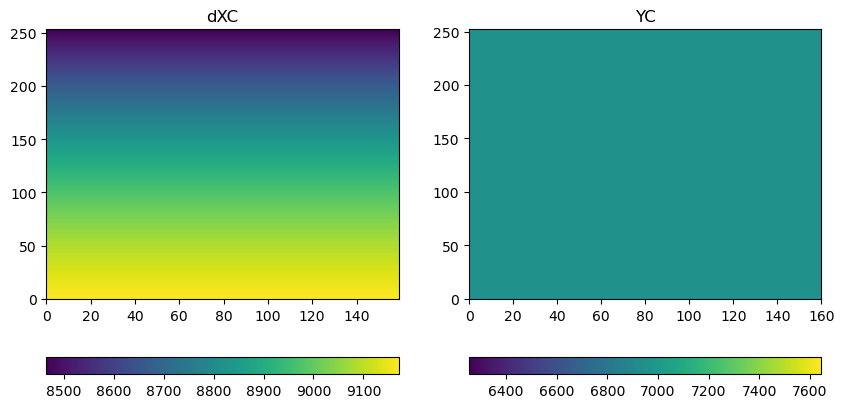

In [7]:
# make a plot of XC and YC
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(dXC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC')

plt.subplot(1,2,2)
C = plt.pcolormesh(dYC.round(3))
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC')

plt.show()

In [8]:
import xarray as xr

# Assuming XC and YC are your model grid longitude and latitude
grid_dataset = xr.Dataset({
    "lon": (["y", "x"], XC),  # Replace "XC" with your longitude grid variable name
    "lat": (["y", "x"], YC)   # Replace "YC" with your latitude grid variable name
})

# Save the grid dataset to a NetCDF file
grid_dataset.to_netcdf("ModelGrid.nc")
